In [1]:
%pwd

'C:\\Users\\82106\\연습'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

%matplotlib inline
plt.rcParams["figure.figsize"] = [12,6]

1. (막대그래프)신규년도별 개인신용카드 신규좌수 
2. (막대그래프)신규년도별 개인신용카드 신규좌수 (각 년도별 ~5월까지 해서 비교)
3. (다중막대차트) 20 ~ 22 각 월별 비교 막대그래프 
4. (원그래프) 20.1 ~ 22.5 신규좌수 중 각 상품별 비중 (파이차트)
5. (가로막대그래프) 22.1 ~ 22.5 Top5 신규상품
6. 1~5 subplot을 이용하여 종합 출력

In [2]:
df = pd.read_excel('data/jb_new_cr_p.xlsx', sheet_name='RAW')

In [5]:
df2 = df.head(20)
df2

,신규년도,신규월,상품명,신규좌수
0,2014,1,AUTO+,1
1,2014,1,J+,17
2,2014,1,JB시그니처,5
3,2014,1,JB아시아나클럽,5
4,2014,1,JB플래티늄,6
5,2014,1,Jedu,31
6,2014,1,Joil,177
7,2014,1,Jshop,345
8,2014,1,Life+,1959
9,2014,1,Life+ST,57


In [6]:
def add_mon(mon):
        return str(mon)+'월'

In [8]:
df2['신규월'] = df2['신규월'].apply(add_mon)
df2

C:\Users\82106\AppData\Local\Temp\ipykernel_888\3833491594.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['신규월'] = df2['신규월'].apply(add_mon)


,신규년도,신규월,상품명,신규좌수
0,2014,1월,AUTO+,1
1,2014,1월,J+,17
2,2014,1월,JB시그니처,5
3,2014,1월,JB아시아나클럽,5
4,2014,1월,JB플래티늄,6
5,2014,1월,Jedu,31
6,2014,1월,Joil,177
7,2014,1월,Jshop,345
8,2014,1월,Life+,1959
9,2014,1월,Life+ST,57


In [9]:
df['상품명'].str.capitalize()

0            Auto+
1               J+
2           Jb시그니처
3         Jb아시아나클럽
4           Jb플래티늄
           ...    
3990         전주시복지
3991        전통시장사랑
3992    탄소융합기술원둘과넷
3993      효사랑병원1st
3994      효사랑병원둘과넷
Name: 상품명, Length: 3995, dtype: object

In [10]:
df.groupby('신규월').get_group('1월')

,신규년도,신규월,상품명,신규좌수
0,2014,1월,AUTO+,1
1,2014,1월,J+,17
2,2014,1월,JB시그니처,5
3,2014,1월,JB아시아나클럽,5
4,2014,1월,JB플래티늄,6
...,...,...,...,...
3817,2022,1월,전주사회복지둘과넷,22
3818,2022,1월,전주시복지,57
3819,2022,1월,전통시장사랑,3
3820,2022,1월,효사랑병원1st,1


In [12]:
df.groupby('신규월').size()['1월']

342

In [17]:
df.groupby(['신규년도','신규월']).mean().sort_values('신규월',ascending=False)

,,신규좌수
신규년도,신규월,
2021,9월,70.021277
2017,9월,360.369565
2015,9월,144.968750
2019,9월,99.306122
2014,9월,129.518519
...,...,...
2017,10월,285.162162
2016,10월,129.083333
2018,10월,205.923077


In [19]:
df.groupby(['신규년도','신규월']).value_counts()

신규년도  신규월  상품명            신규좌수
2014  10월  AUTO+          1254    1
           J+             37      1
           JB시그니처         6       1
           JB아시아나클럽       5       1
           JB아시아나클럽_개인    4       1
                                 ..
2022  5월   JBPharm(청구할인)  1       1
           JB골든에이지        73      1
           JB아시아나클럽_개인    2       1
           Joil           28      1
           효사랑병원둘과넷       8       1
Length: 3995, dtype: int64

In [20]:
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


1) 전체 데이터 중에서 영화정보만 출력하시오.

In [21]:
df['영화']

0           명량
1         극한직업
2    신과함께-죄와 벌
3         국제시장
4           괴물
5          도둑들
6      7번방의 선물
7           암살
Name: 영화, dtype: object

2) 전체 데이터 중에서 영화,평점 정보만 출력하시오.

In [29]:
df[['영화','평점']]

,영화,평점
0,명량,8.88
1,극한직업,9.20
2,신과함께-죄와 벌,8.73
3,국제시장,9.16
4,괴물,8.62
5,도둑들,7.64
6,7번방의 선물,8.83
7,암살,9.10


In [30]:
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


3) 2015년 이후에 개봉한 영화 데이터 중에서 '영화','개봉연도' 정보를 출력하시오.

In [34]:
fillter = df['개봉 연도']>=2015
df2 = df[fillter]
df2[['영화','개봉 연도']]

,영화,개봉 연도
1,극한직업,2019
2,신과함께-죄와 벌,2017
7,암살,2015


In [35]:
df.loc[df['개봉 연도']>=2015, ['영화','개봉 연도']]

,영화,개봉 연도
1,극한직업,2019
2,신과함께-죄와 벌,2017
7,암살,2015


In [44]:
df.loc[:,['영화','개봉 연도']]

,영화,개봉 연도
0,명량,2014
1,극한직업,2019
2,신과함께-죄와 벌,2017
3,국제시장,2014
4,괴물,2006
5,도둑들,2012
6,7번방의 선물,2013
7,암살,2015


In [50]:
df.iloc[:,:2]

,영화,개봉 연도
0,명량,2014
1,극한직업,2019
2,신과함께-죄와 벌,2017
3,국제시장,2014
4,괴물,2006
5,도둑들,2012
6,7번방의 선물,2013
7,암살,2015


4) 주어진 계산식을 참고하여 '추천 점수' Column을 추가하시오.

In [51]:
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


In [56]:
df['추천 점수'] = ((df['관객 수']*df['평점'])/100).astype(int)

In [61]:
df['추천 점수'] = (df['관객 수']*df['평점'])//100 #나누기 2번은 1자리 정수값 반환

In [62]:
df

,영화,개봉 연도,관객 수,평점,추천 점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


5) 전체 데이터를 '개봉 연도'기준 내림차순으로 출력

In [63]:
df.sort_values(by='개봉 연도', ascending = False)

,영화,개봉 연도,관객 수,평점,추천 점수
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
7,암살,2015,1270,9.10,115.0
0,명량,2014,1761,8.88,156.0
3,국제시장,2014,1426,9.16,130.0
6,7번방의 선물,2013,1281,8.83,113.0
5,도둑들,2012,1298,7.64,99.0
4,괴물,2006,1301,8.62,112.0


In [65]:
import matplotlib.pyplot as plt #다양한 형태의 그래프로 데이터 시각화

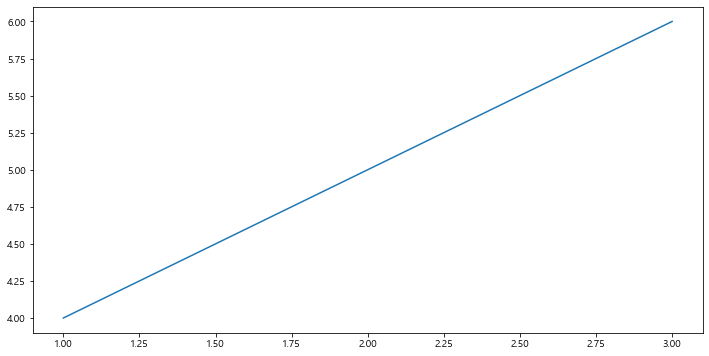

In [67]:
x = [1,2,3]
y = [4,5,6]

plt.plot(x,y)
plt.show() #글자들 안나오게 한다.